In [23]:
#A Suppot Vector Machine is also a classification algorithm.
#The idea is to draw a line between two or more classes in the best possible manner.
#Support Vectors are the points that lie on the two margines.
#With a series of points, one would find the formula for the hyperplane, together with the two margines.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


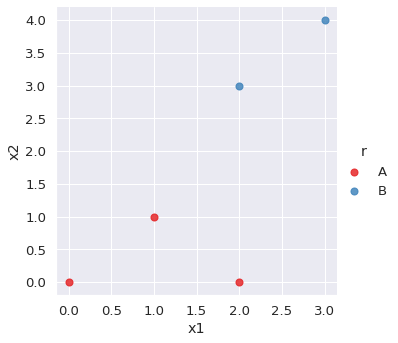

In [1]:
from ast import increment_lineno
from io import IncrementalNewlineDecoder
#Using Sci-kit learn for SVM

%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
import matplotlib.pyplot as plt

data = pd.read_csv('SVM.csv')
sns.lmplot('x1', 'x2',
           data=data,
           hue='r',
           palette='Set1',
           fit_reg=False,
           scatter_kws={"s": 50});

In [2]:
#Using the data points that we have previously loaded, now let's use Scikit-learns svm module's svc class to holp us derive the value for the various variables that we need to compute otehrwise.
#The following uses linear kernel to solve the problem:

from sklearn import svm
#---converting the columns as matricies---
points = data[['x1', 'x2']].values
result = data['r']

clf = svm.SVC(kernel = 'linear')
clf.fit(points, result)

print('Vector of weights (w) = ',clf.coef_[0])
print('b = ', clf.intercept_[0])
print('Indices of support vectors =', clf.support_)
print('Support vectors =', clf.support_vectors_)
print('Number of support vectors for each class=', clf.n_support_)
print('Coefficients of the support vector in the decision function =',np.abs(clf.dual_coef_))

Vector of weights (w) =  [0.4 0.8]
b =  -2.2
Indices of support vectors = [1 2]
Support vectors = [[1. 1.]
 [2. 3.]]
Number of support vectors for each class= [1 1]
Coefficients of the support vector in the decision function = [[0.4 0.4]]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


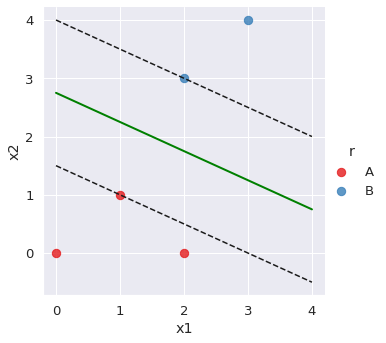

In [3]:
#With the slope and y-intercept of the line found, you can now go ahead and plot the hyperplane:

#---w is the vector of weights---
w = clf.coef_[0]

#----find the slope of the hyperplane---
slope = -w[0] / w[1]

b = clf.intercept_[0]

#---find the coordinates for the hyperplane---
xx = np.linspace(0,4)
yy = slope * xx - (b / w[1])

#---plot the margins---
s = clf.support_vectors_[0]
yy_down = slope * xx + (s[1] - slope * s[0])

s = clf.support_vectors_[-1]    #---last support vector---
yy_up = slope * xx + (s[1] - slope * s[0])

#---plot the points---
sns.lmplot('x1', 'x2', data=data, hue='r', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

#---plot the hyperplane---
plt.plot(xx, yy, linewidth=2, color='green');

#---plot the 2 margins---
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')


In [4]:
#Remember, the goal of SVM is to separate the oints into two or more classes, so that you can use it to predict the classes of future points.
#The following code uses the model to perform some predictions:
print(clf.predict([[3,3]])[0]) #'B'
print(clf.predict([[4,0]])[0]) #'A'
print(clf.predict([[2,2]])[0]) #'B'
print(clf.predict([[1,2]])[0]) #'A'

B
A
B
A


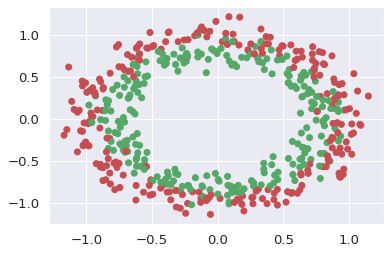

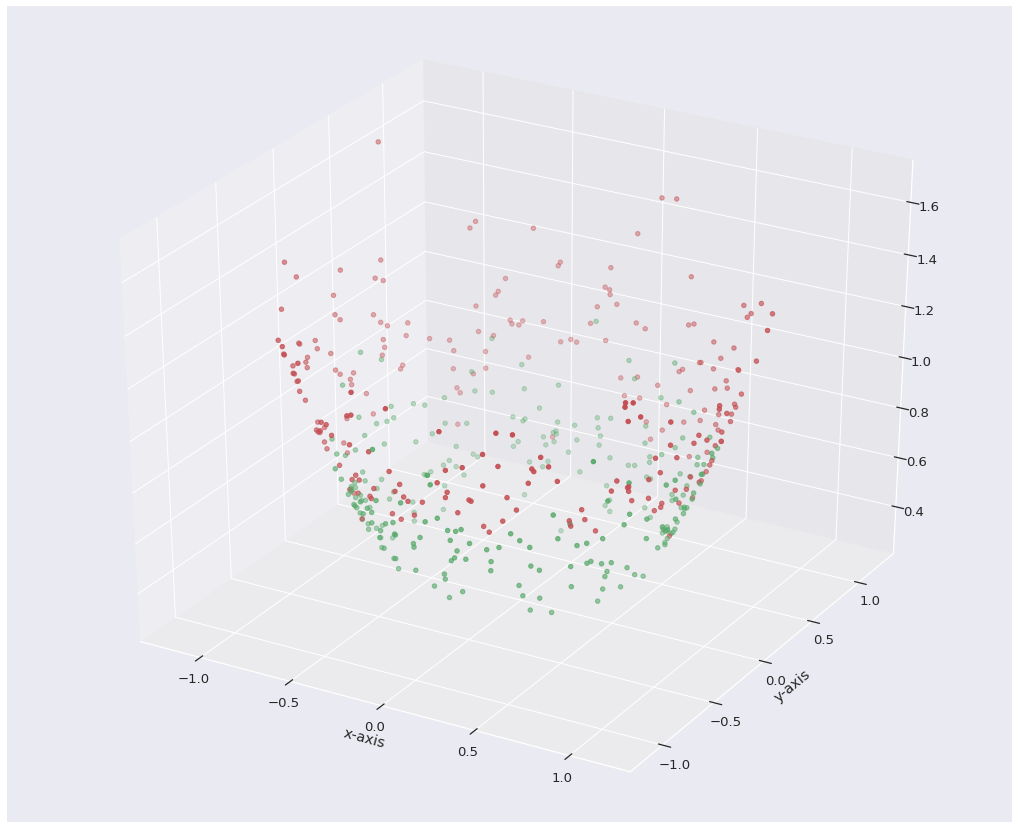

In [5]:
#Sometimes the points in a dataset are not always linearly separable.
#There is the technique called the Kernel Trick.
#This is a technique in machine learning that transforms data into a higher dimension space so that, after the transformation, it has a clear dividing margin between classes of data.

#Here's an example:

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)

rgb = np.array(['r', 'g'])
plt.scatter(X[:, 0], X[:, 1], color=rgb[c])
plt.show()

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
z = X[:, 0]**2 + X[:,1]**2
ax.scatter(X[:,0], X[:,1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

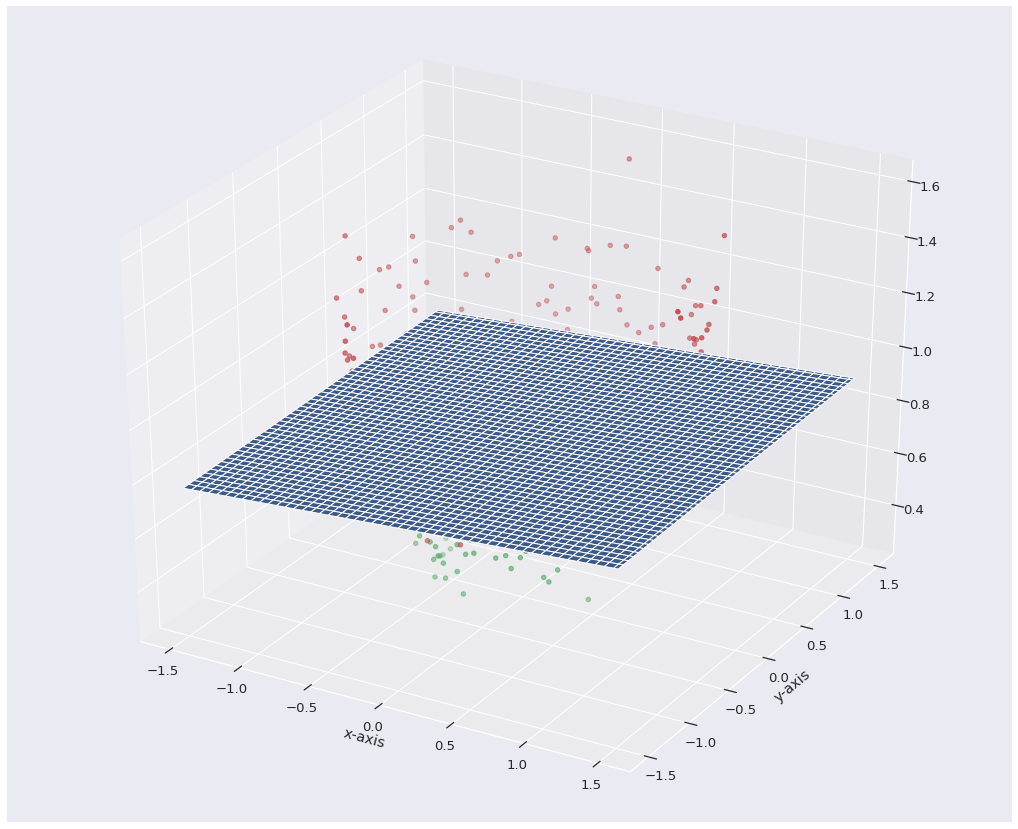

In [6]:
#Wih the points plotted in a 3D chart, let's now train the model using the third dimension:

#---combine X and z into a single ndarray---
features = np.concatenate((X,z.reshape(-1,1)), axis=1)

#---use svm for training---
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)

#The next step is to draw the hyperplane in 3D.  To do that, you need to find the value of X, which is done as follows:
x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) / clf.coef_[0][2]

#Now we plot the hyperplane in 3d

tmp = np.linspace(-1.5, 1.5, 100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x, y, x3(x,y))
plt.show()

#The entire code snippet as follows:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles

#---X is features and c is the class labels---
X, c = make_circles(n_samples=500, noise=0.09)
z = X[:, 0]**2 + X[:,1]**2

rgb = np.array(['r', 'g'])

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], z, color=rgb[c])
plt.xlabel("x-axis")
plt.ylabel("y-axis")

features = np.concatenate((X,z.reshape(-1,1)), axis=1)

from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(features, c)

x3 = lambda x,y: (-clf.intercept_[0] - clf.coef_[0][0] * x-clf.coef_[0][1] * y) / clf.coef_[0][2]

tmp = np.linspace(-1.5, 1.5, 100)
x,y = np.meshgrid(tmp,tmp)

ax.plot_surface(x, y, x3(x,y))
plt.show()

In [7]:
#Types of Kernels
#Sometimes, not all points can be separated linearly, nor can they be separated using the kernel tricks that you observed previously.
#To understand how kernls work, let's use the Iris daset as an example:

%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()
print(iris.data[0:5])
print(iris.feature_names)

print(iris.target[0:5])
print(iris.target_names)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0]
['setosa' 'versicolor' 'virginica']


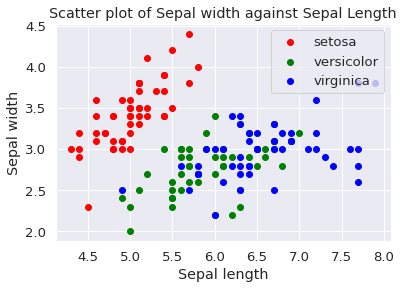

In [8]:
X = iris.data[:, :2]
y = iris.target

#---Plot the points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.title('Scatter plot of Sepal width against Sepal Length')
plt.show()

In [ ]:
#Instead of drawing the lines to separate the three groups of iris flowers, this time we will paint the grps in colors using the contourf() function:

#---min and max for the first feature---
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

#---min and max for the second feature---
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#---step size in the mesh---
h = (x_max / x_min)/100

#---make predictions for each of the points in xx,yy---
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#---draw the result using a color plot---
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

#---plot the training points---
colors = ['red', 'green', 'blue']
for color, i, target in zip(colors, [0, 1, 2], iris.target_names):
  plt.scatter(X[y==i, 1], X[y==i, 1], color=color, label=target)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(title)
plt.legend(loc='best', shadow=False, scatterpoints=1)

#There is a problem with the output, but this is the correct code.

In [ ]:
predictions = clf.predict(X)
preint(no.unique(preditions, return_counts=True))

In [ ]:
#PolyNomial Kernel
#A Polynomial kernel of degree 1 is similar to that of the linear kernel.
#They afford more flexible decision boundary.

In [ ]:
#Summary
#In this chapter, I learned about how Support Vector Machines help in classification problems.  I learned about the formula for finding the hyperplane, as well as the two accompoanying margins.
#Fortunately, Scikit-learn provides the classes needed for training models using SVM, and with the paraeters returned, I can plot the hyperplane and margins visually so that I can understand how SVM works.  
#I also learned about the various kernels that I can apply to my SVM algorithms so that the dataset can be separated linearly.